In [143]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


In [144]:
init_df = pd.read_excel(
    "33010DO001_2019_ST_AUST.xlsx", sheet_name="Table 1.1"
)  # , skiprows=6)
init_df.head(10)


,Australian Bureau of Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96
0,"33010DO001 Births, Australia 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Released at 11.30am (Canberra time) Wed 9 Dec ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Table 1.1 Births, Summary, Statistical Areas L...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Age-specific fertility rates,NaN,NaN,NaN,NaN,NaN,...,NaN,Age-specific fertility rates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Place of Usual Residence,NaN,Estimated resident population,Births,15–19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,...,Births,15–19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,Total fertility rate,Median age of mother
6,2016 ASGS code,"2016 GCCSA, SA4",persons,no.,rate,rate,rate,rate,rate,rate,...,no.,rate,rate,rate,rate,rate,rate,rate,rate,years
7,1,NEW SOUTH WALES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,102,Central Coast,325163,3740,17,69.4,127.9,126.8,62.2,12.2,...,3821,10.3,56.1,118.8,131,66.2,13.8,1.2,1.99,30.7
9,115,Sydney - Baulkham Hills and Hawkesbury,221249,2250,2.9,22,93.3,152.2,72.3,13.9,...,2427,1.5,16.9,82,141.7,72.6,14.5,0.9,1.65,32.8


In [145]:
this_one = 0
last_one = -1
windows = []
int_index = 0
for i, x in init_df.loc[3].iteritems():
    int_index += 1
    if type(x) is int:
        last_one = this_one
        this_one = int_index
        windows.append({"start": last_one-1, "stop": this_one - 1, "year": x-1})
        # print(i, x)
windows.pop(0)  # remove the first one
windows


[{'start': 2, 'stop': 14, 'year': 2012},
 {'start': 14, 'stop': 26, 'year': 2013},
 {'start': 26, 'stop': 38, 'year': 2014},
 {'start': 38, 'stop': 50, 'year': 2015},
 {'start': 50, 'stop': 62, 'year': 2016},
 {'start': 62, 'stop': 74, 'year': 2017},
 {'start': 74, 'stop': 86, 'year': 2018}]

In [146]:
def safe_isupper(x):
    try:
        return x.isupper()
    except:
        return False

In [147]:

dfs = []
for w in windows:
    cols = [1] + list(range(w["start"], w["stop"]))
    print(w, "cols", cols)
    df = pd.read_excel(
        "33010DO001_2019_ST_AUST.xlsx",
        sheet_name="Table 1.1",
        skiprows=6,
        usecols=cols,
    )
    df["year"] = w["year"] #pd.Timestamp(year=w["year"], month=1, day=1, hour=0)
    df.columns = [x.replace("years", "").replace("(a)", "").split(".")[0].strip() for x in df.columns]
    df.rename(columns={'Unnamed: 1':'place'}, inplace=True)
    df.drop([0], inplace=True)
    df.drop([i for i, x in df.place.iteritems() if safe_isupper(x)], inplace=True)
    df.drop([i for i, x in df.place.iteritems() if type(x) is float], inplace=True)
    dfs.append(df)


dfs[0].head(4)
    

{'start': 2, 'stop': 14, 'year': 2012} cols [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{'start': 14, 'stop': 26, 'year': 2013} cols [1, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
{'start': 26, 'stop': 38, 'year': 2014} cols [1, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
{'start': 38, 'stop': 50, 'year': 2015} cols [1, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
{'start': 50, 'stop': 62, 'year': 2016} cols [1, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
{'start': 62, 'stop': 74, 'year': 2017} cols [1, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
{'start': 74, 'stop': 86, 'year': 2018} cols [1, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]


,place,Estimated resident population,Births,15–19,20-24,25-29,30-34,35-39,40-44,45-49,Total fertility rate,Median age of mother,Unnamed: 13,year
2,Central Coast,325163,3740,17,69.4,127.9,126.8,62.2,12.2,0.6,2.08,29.9,NaN,2012
3,Sydney - Baulkham Hills and Hawkesbury,221249,2250,2.9,22,93.3,152.2,72.3,13.9,0.8,1.79,32.6,NaN,2012
4,Sydney - Blacktown,320288,5504,22.9,75.8,143,134.9,65.6,13.7,0.6,2.28,29.7,NaN,2012
5,Sydney - City and Inner South,291397,3752,7.2,13.1,36.6,81.3,86,26.6,1.4,1.26,33,NaN,2012


In [148]:
birth_df = pd.concat(dfs)
birth_df.drop([x for x in birth_df.columns if ("Unnamed" in x)], axis="columns", inplace=True, errors="ignore")
print(birth_df.shape)
birth_df.sample(5)

(770, 13)


,place,Estimated resident population,Births,15–19,20-24,25-29,30-34,35-39,40-44,45-49,Total fertility rate,Median age of mother,year
104,Greater Hobart,232691,2535,13.7,49.5,92.7,118.2,67.7,14.1,0.9,1.78,30.9,2018
63,Moreton Bay - South,178797,2710,14.1,68.4,138.7,138.9,63.9,13,0.4,2.19,30.5,2012
72,Toowoomba,152862,2004,16.2,67,124,121.4,52.1,8.3,0.7,1.95,29.1,2016
82,Greater Adelaide,1277850,15975,13.3,43.8,100.4,124.4,66.6,13.8,0.8,1.82,30.7,2012
74,Wide Bay,287057,3201,35.1,117.5,142.3,108,45.6,9.9,0.5,2.29,27.9,2013


In [151]:
birth_df.to_excel("births.xlsx")

<AxesSubplot:>

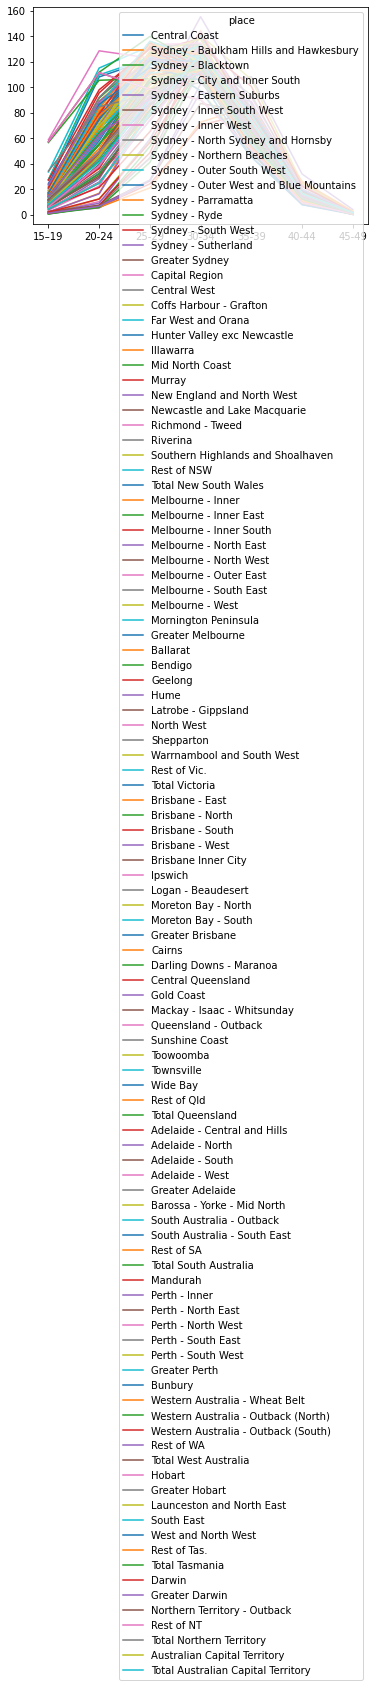

In [150]:
# this is a real faff
b18 = birth_df.groupby("year").get_group(2018)
cols_to_plot = ["place", "15–19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49"]
b18[cols_to_plot].set_index("place").transpose().plot()
